# Task 3 - Experience Analytics

## Task 3.1 - Aggregate, per customer, the following information:

• Average TCP retransmission

• Average RTT

• Handset type

• Average throughput

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
df = pd.read_csv('telcom_data.csv')

In [3]:
# Convert spaces into underscore in column name of dataframe and Uppercase to lowercase

def new_columns(df):
    df.columns= [column.replace(' ', '_').lower() for column in df.columns]
    return df

In [4]:
df = new_columns(df)

In [5]:
df

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,29-04-2019 07:28,451.0,30-04-2019 06:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,29-04-2019 07:28,483.0,30-04-2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,29-04-2019 07:28,283.0,30-04-2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,29-04-2019 07:28,696.0,30-04-2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 149010 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150000 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150000 non-null  float64
 5   dur._(ms)                                 150000 non-null  float64
 6   imsi                                      149431 non-null  float64
 7   msisdn/number                             148935 non-null  float64
 8   imei                                      149429 non-null  float64
 9   last_location_name                        148848 non-null  object 
 10  avg_rtt_dl_(ms)     

### We need to combine the total UL and Dl data of each application

In [7]:
df["social_media"] = df["social_media_dl_(bytes)"] + df['social_media_ul_(bytes)']
df["google"] = df["google_dl_(bytes)"] + df["google_ul_(bytes)"]
df['email'] = df["email_dl_(bytes)"] + df["email_ul_(bytes)"]
df['youtube'] = df["youtube_dl_(bytes)"] + df["youtube_ul_(bytes)"]
df['netflix'] = df["netflix_dl_(bytes)"] + df["netflix_ul_(bytes)"]
df["gaming"] = df["gaming_dl_(bytes)"] + df["gaming_ul_(bytes)"]
df['other']= df["other_dl_(bytes)"]+ df["other_ul_(bytes)"]
df['total_data'] = df['total_dl_(bytes)'] + df['total_ul_(bytes)']

In [8]:
df1 =df.rename(columns={'msisdn/number': 'msisdn', 'dur._(ms)': 'duration' })

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 149010 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150000 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150000 non-null  float64
 5   duration                                  150000 non-null  float64
 6   imsi                                      149431 non-null  float64
 7   msisdn                                    148935 non-null  float64
 8   imei                                      149429 non-null  float64
 9   last_location_name                        148848 non-null  object 
 10  avg_rtt_dl_(ms)     

## We need to combine the total UL and Dl data and Create a new DataFrame

In [10]:
df1["tcp_retrans"] = df1["tcp_dl_retrans._vol_(bytes)"] + df1['tcp_ul_retrans._vol_(bytes)']
df1["avg_rtt"] = df1["avg_rtt_dl_(ms)"] + df1["avg_rtt_ul_(ms)"]
df1['avg_tp'] = df1["avg_bearer_tp_dl_(kbps)"] + df1["avg_bearer_tp_ul_(kbps)"]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 66 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 149010 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150000 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150000 non-null  float64
 5   duration                                  150000 non-null  float64
 6   imsi                                      149431 non-null  float64
 7   msisdn                                    148935 non-null  float64
 8   imei                                      149429 non-null  float64
 9   last_location_name                        148848 non-null  object 
 10  avg_rtt_dl_(ms)     

In [12]:
# Replace missing values and outliers with the mean or mode of the corresponding variable
df1.isnull().sum()

bearer_id        991
start              1
start_ms           1
end                1
end_ms             1
               ...  
other              0
total_data         1
tcp_retrans    99530
avg_rtt        27840
avg_tp             1
Length: 66, dtype: int64

In [13]:
df1['tcp_retrans'].fillna(df1['tcp_retrans'].mean(), inplace=True)

df1['avg_rtt'].fillna(df1['avg_rtt'].mean(), inplace=True)

df1['avg_tp'].fillna(df1['avg_tp'].mean(), inplace=True)

df1['handset_type'].fillna(df1['handset_type'].mode()[0], inplace=True)

In [14]:
df1.isnull().sum()

bearer_id      991
start            1
start_ms         1
end              1
end_ms           1
              ... 
other            0
total_data       1
tcp_retrans      0
avg_rtt          0
avg_tp           0
Length: 66, dtype: int64

In [15]:
# Group by customer (msisdn ) and calculate the average of each variable
agg_df = df1.groupby('msisdn').agg({
    'tcp_retrans': 'mean',
    'avg_rtt': 'mean',
    'handset_type': 'first',
    'avg_tp': 'mean'
}).reset_index()
agg_df

,msisdn,tcp_retrans,avg_rtt,handset_type,avg_tp
0,3.360100e+10,2.571697e+07,46.000000,Huawei P20 Lite Huawei Nova 3E,76.0
1,3.360100e+10,2.571697e+07,31.000000,Apple iPhone 7 (A1778),99.0
2,3.360100e+10,2.571697e+07,127.024885,undefined,97.0
3,3.360101e+10,2.571697e+07,84.000000,Apple iPhone 5S (A1457),248.0
4,3.360101e+10,1.754390e+07,59.500000,Apple iPhone Se (A1723),28422.0
...,...,...,...,...,...
106851,3.379000e+10,2.180450e+05,52.000000,Huawei Honor 9 Lite,10365.0
106852,3.379000e+10,2.571697e+07,40.000000,Apple iPhone 8 Plus (A1897),116.0
106853,3.197020e+12,2.571697e+07,127.024885,Quectel Wireless. Quectel Ec25-E,1.0
106854,3.370000e+14,2.571697e+07,127.024885,Huawei B525S-23A,33.0


In [16]:
agg_df.head(10).style.background_gradient(cmap = "Oranges")

,msisdn,tcp_retrans,avg_rtt,handset_type,avg_tp
0,33601001722.000000,25716966.336391,46.000000,Huawei P20 Lite Huawei Nova 3E,76.000000
1,33601001754.000000,25716966.336391,31.000000,Apple iPhone 7 (A1778),99.000000
2,33601002511.000000,25716966.336391,127.024885,undefined,97.000000
3,33601007832.000000,25716966.336391,84.000000,Apple iPhone 5S (A1457),248.000000
4,33601008617.000000,17543899.168196,59.500000,Apple iPhone Se (A1723),28422.000000
5,33601010682.000000,25716966.336391,75.512443,Samsung Galaxy A8 (2018),3954.000000
6,33601011634.000000,12913599.168196,26.500000,Huawei Mate 10 Pro Porsche Design Huawei Mate 10,21256.500000
7,33601011959.000000,25716966.336391,52.000000,Samsung Galaxy S8 Plus (Sm-G955F),1247.000000
8,33601014694.000000,25716966.336391,127.024885,undefined,94.500000
9,33601020306.000000,25716966.336391,62.000000,Apple iPhone X (A1865),146.000000


## Task 3.2 - Compute & list 10 of the top, bottom and most frequent:

In [17]:
# Compute the top, bottom, and most frequent values for TCP
top_tcp = df1['tcp_retrans'].nlargest(10)
bottom_tcp = df1['tcp_retrans'].nsmallest(10)
most_frequent_tcp = df1['tcp_retrans'].value_counts().head(10)

# Compute the top, bottom, and most frequent values for RTT
top_rtt = df1['avg_rtt'].nlargest(10)
bottom_rtt = df1['avg_rtt'].nsmallest(10)
most_frequent_rtt = df1['avg_rtt'].value_counts().head(10)

# Compute the top, bottom, and most frequent values for throughput
top_throughput = df1['avg_tp'].nlargest(10)
bottom_throughput = df1['avg_tp'].nsmallest(10)
most_frequent_throughput = df1['avg_tp'].value_counts().head(10)

# Print the results
print("*"*50)
print("Top TCP values:")
print(top_tcp)
print("\nBottom TCP values:")
print(bottom_tcp)
print("\nMost frequent TCP values:")
print(most_frequent_tcp)
print("*"*50)

print("*"*50)
print("\nTop RTT values:")
print(top_rtt)
print("\nBottom RTT values:")
print(bottom_rtt)
print("\nMost frequent RTT values:")
print(most_frequent_rtt)
print("*"*50)

print("*"*50)
print("\nTop throughput values:")
print(top_throughput)
print("\nBottom throughput values:")
print(bottom_throughput)
print("\nMost frequent throughput values:")
print(most_frequent_throughput)
print("*"*50)

**************************************************
Top TCP values:
34636     4.344116e+09
140797    4.301477e+09
77950     4.294432e+09
135677    4.291465e+09
3741      4.288121e+09
119667    4.275492e+09
39608     4.268647e+09
59011     4.261616e+09
76971     4.260174e+09
41182     4.254660e+09
Name: tcp_retrans, dtype: float64

Bottom TCP values:
143594     86.0
111100     97.0
18417     106.0
13142     108.0
97061     113.0
8794      128.0
99947     129.0
83214     134.0
95955     134.0
12849     143.0
Name: tcp_retrans, dtype: float64

Most frequent TCP values:
2.571697e+07    99530
2.660000e+03       29
5.320000e+03       24
6.650000e+03       20
3.990000e+03       19
7.980000e+03       14
1.873000e+03       13
2.648000e+03        9
1.596000e+04        9
1.064000e+04        8
Name: tcp_retrans, dtype: int64
**************************************************
**************************************************

Top RTT values:
30155     96924.0
29916     64641.0
17894     55812.0
596

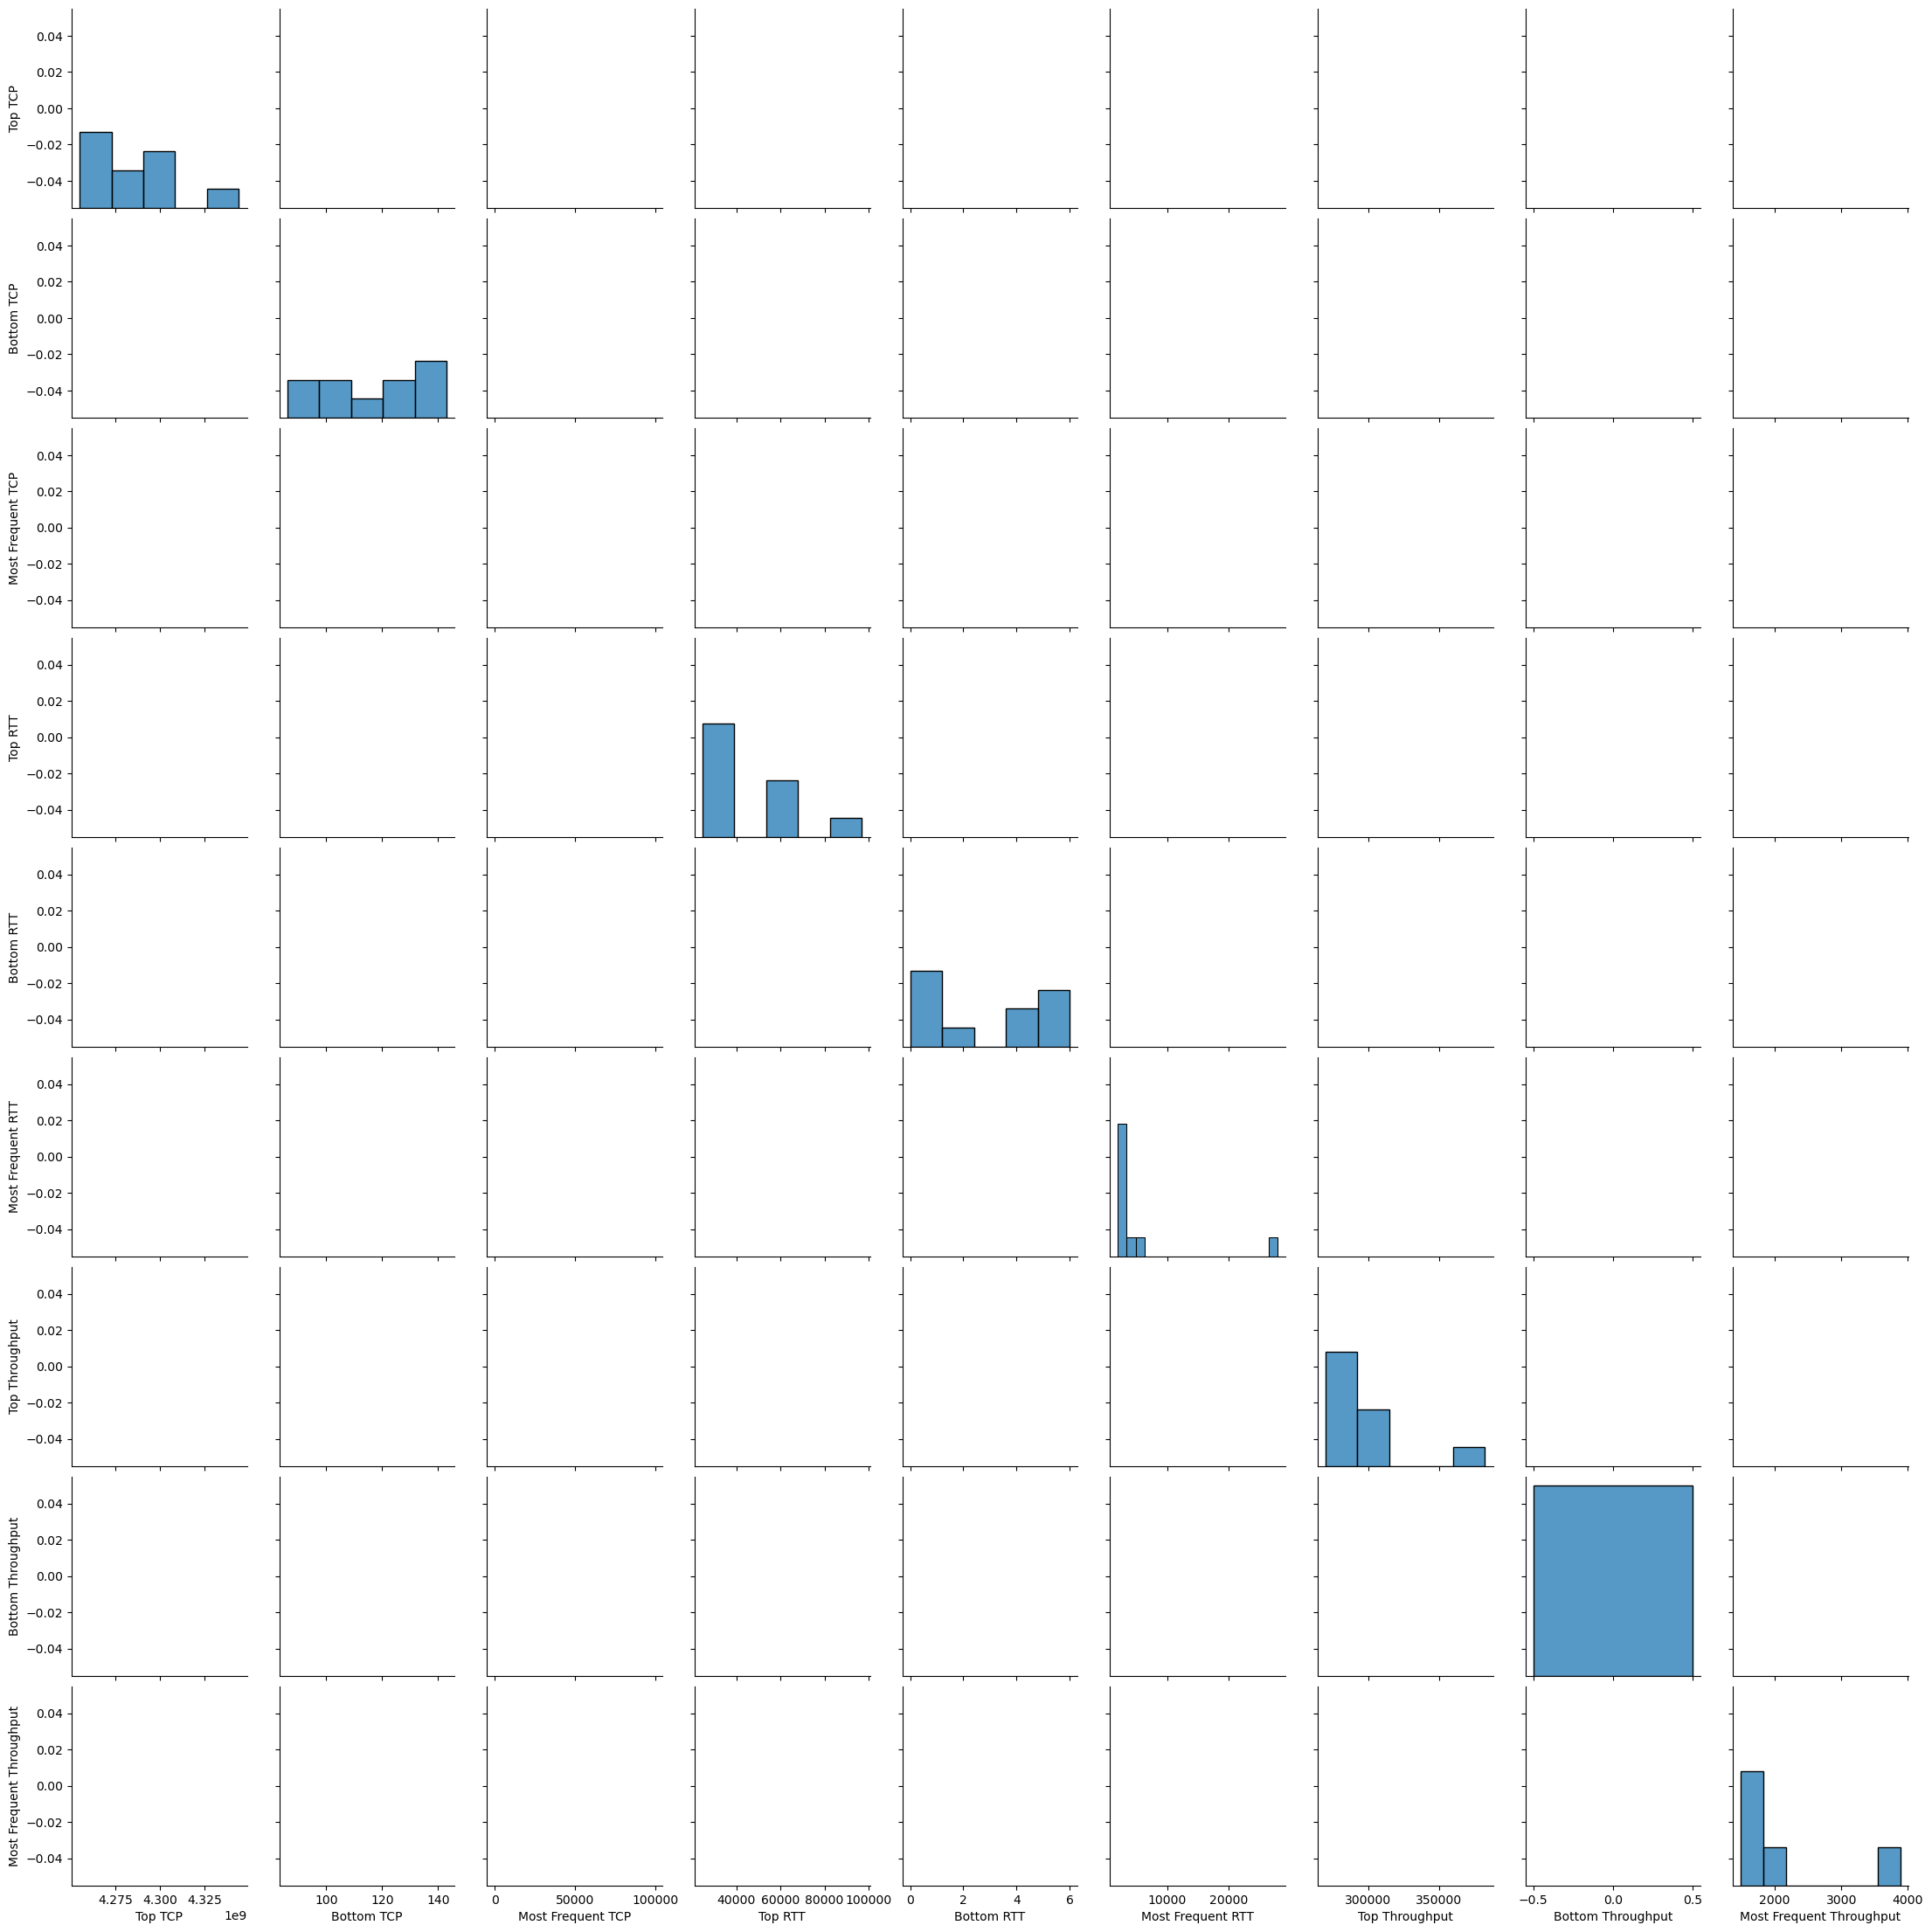

In [18]:
# Create a DataFrame with the top, bottom, and most frequent values
pairplot_df = pd.DataFrame({
    'Top TCP': top_tcp,
    'Bottom TCP': bottom_tcp,
    'Most Frequent TCP': most_frequent_tcp,
    'Top RTT': top_rtt,
    'Bottom RTT': bottom_rtt,
    'Most Frequent RTT': most_frequent_rtt,
    'Top Throughput': top_throughput,
    'Bottom Throughput': bottom_throughput,
    'Most Frequent Throughput': most_frequent_throughput
})

# Plot the pair plot
sns.pairplot(pairplot_df)
plt.show()

## Task 3.3 - Compute & report:

In [19]:
# Compute the distribution of average throughput per handset type
throughput_distribution = df1.groupby('msisdn')['avg_tp'].mean()

# Compute the average TCP retransmission view per handset type
tcp_retransmission_view = df1.groupby('msisdn')['tcp_retrans'].mean()

# Print the results
print("Distribution of Average Throughput per Handset Type:")
print(throughput_distribution)
print("\nAverage TCP Retransmission View per Handset Type:")
print(tcp_retransmission_view)

Distribution of Average Throughput per Handset Type:
msisdn
3.360100e+10       76.0
3.360100e+10       99.0
3.360100e+10       97.0
3.360101e+10      248.0
3.360101e+10    28422.0
                 ...   
3.379000e+10    10365.0
3.379000e+10      116.0
3.197020e+12        1.0
3.370000e+14       33.0
8.823970e+14        2.0
Name: avg_tp, Length: 106856, dtype: float64

Average TCP Retransmission View per Handset Type:
msisdn
3.360100e+10    2.571697e+07
3.360100e+10    2.571697e+07
3.360100e+10    2.571697e+07
3.360101e+10    2.571697e+07
3.360101e+10    1.754390e+07
                    ...     
3.379000e+10    2.180450e+05
3.379000e+10    2.571697e+07
3.197020e+12    2.571697e+07
3.370000e+14    2.571697e+07
8.823970e+14    2.571697e+07
Name: tcp_retrans, Length: 106856, dtype: float64


In [21]:
handset_agg = df1.groupby('handset_type').agg({'avg_tp': 'sum','tcp_retrans': 'sum'})

sorted_handset_agg = handset_agg.sort_values(by=['avg_tp'], ascending=False).head(10)

handset_tp_df = sorted_handset_agg[['avg_tp']]
handset_tp_df

,avg_tp
handset_type,
Huawei B528S-23A,8.406310e+08
undefined,9.041473e+07
Apple iPhone 7 (A1778),7.718340e+07
Apple iPhone 6S (A1688),7.429823e+07
Apple iPhone 6 (A1586),6.873501e+07
Huawei E5180,6.436863e+07
Samsung Galaxy S8 (Sm-G950F),6.322440e+07
Apple iPhone Xr (A2105),6.243611e+07
Apple iPhone 8 (A1905),5.810655e+07


In [22]:
handset_tcp_df = sorted_handset_agg[['tcp_retrans']]
handset_tcp_df

,tcp_retrans
handset_type,
Huawei B528S-23A,1.119992e+12
undefined,1.888953e+11
Apple iPhone 7 (A1778),1.321191e+11
Apple iPhone 6S (A1688),2.128012e+11
Apple iPhone 6 (A1586),1.941548e+11
Huawei E5180,6.881733e+10
Samsung Galaxy S8 (Sm-G950F),8.894571e+10
Apple iPhone Xr (A2105),1.022957e+11
Apple iPhone 8 (A1905),1.087810e+11


First lets see if there is an outliers that has potential to destort our interpretation

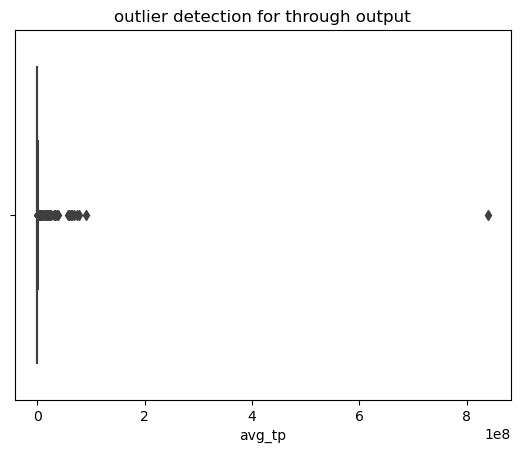

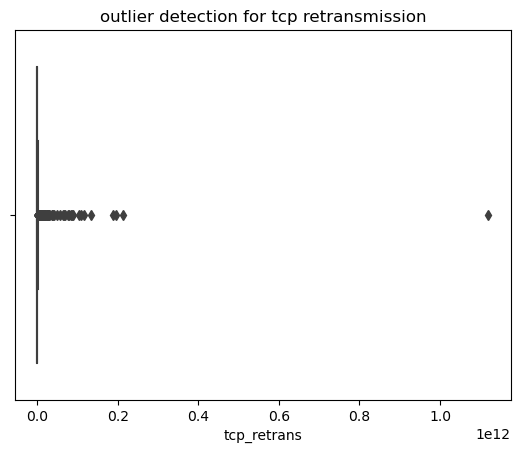

In [23]:
sns.boxplot(data=handset_agg, x='avg_tp').set(title='outlier detection for through output')
plt.show()

sns.boxplot(data=handset_agg, x='tcp_retrans').set(title='outlier detection for tcp retransmission')
plt.show()

In [26]:
def handle_outliers(df1, col):
    df1 = df1.copy()
    q1 = df1[col].quantile(0.25)
    q2 = df1[col].quantile(0.50)
    q3 = df1[col].quantile(0.75)
    
    iqr=q3-q1
    lower_range=q1-iqr*1.5
    upper_range=q3+iqr*1.5
    
    df1[col] = np.where(df1[col] < lower_range, lower_range, df1[col])
    df1[col] = np.where(df1[col] > upper_range, upper_range, df1[col])
    
    return df1

In [27]:
def hist_plot(cleaned_handset_agg:pd.DataFrame, column:str, color:str):
    plt.figure(figsize=(9, 7))
    sns.displot(data=cleaned_handset_agg, x=column,color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

<Figure size 900x700 with 0 Axes>

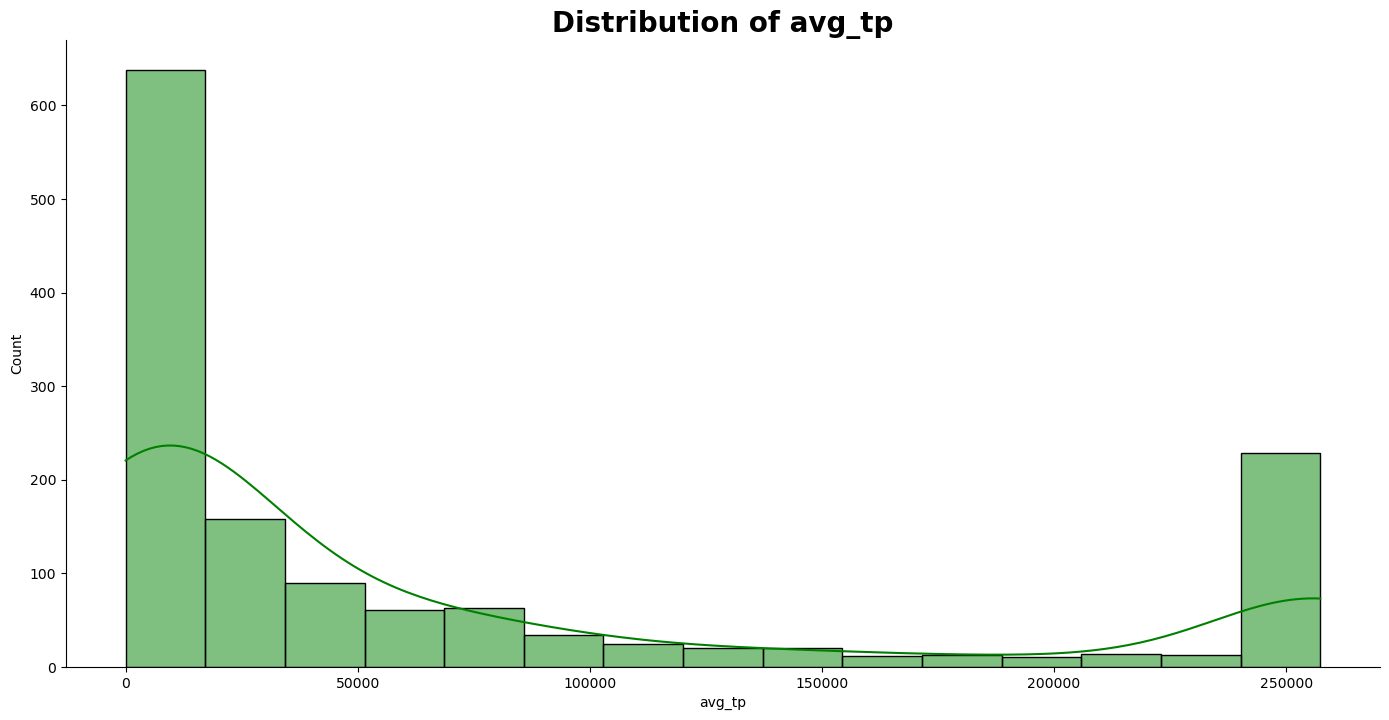

,avg_tp,tcp_retrans
count,1396.000000,1.396000e+03
mean,72215.388789,2.763303e+09
std,94300.158957,3.263027e+10
min,0.000000,3.600000e+02
25%,2641.750000,9.743113e+06
50%,22474.000000,2.611846e+07
75%,104523.750000,1.248504e+08
max,257346.750000,1.119992e+12


In [28]:
cleaned_handset_agg = handle_outliers(handset_agg, 'avg_tp')

hist_plot(cleaned_handset_agg, 'avg_tp', 'green')
cleaned_handset_agg.describe()

The distribution of the average average TCP retransmission view per handset type

<Figure size 900x700 with 0 Axes>

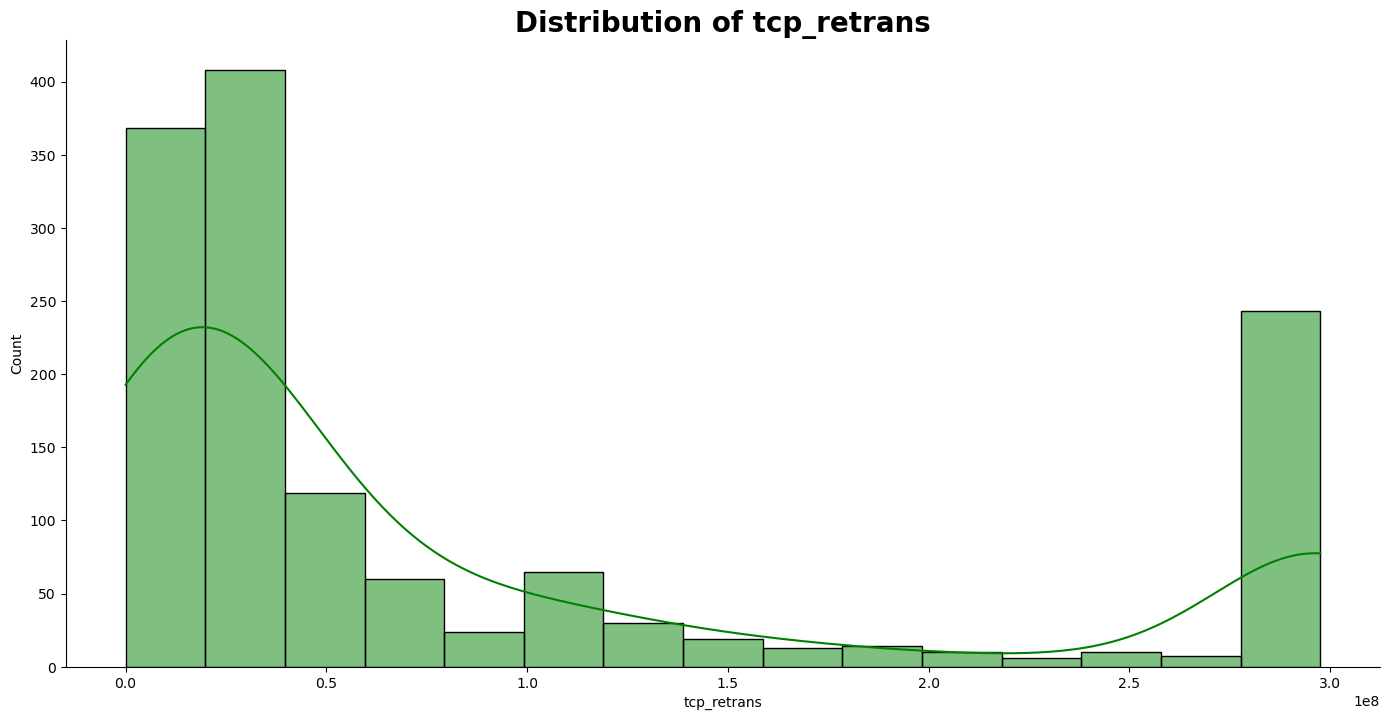

,avg_tp,tcp_retrans
count,1.396000e+03,1.396000e+03
mean,1.619331e+06,8.792768e+07
std,2.331838e+07,1.076423e+08
min,0.000000e+00,3.600000e+02
25%,2.641750e+03,9.743113e+06
50%,2.247400e+04,2.611846e+07
75%,1.045238e+05,1.248504e+08
max,8.406310e+08,2.975112e+08


In [29]:
cleaned_handset_agg = handle_outliers(handset_agg, 'tcp_retrans')

hist_plot(cleaned_handset_agg, 'tcp_retrans', 'green')
cleaned_handset_agg.describe()

### Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

In [30]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans

# Normalize the experience  metrics
def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)

In [31]:
def cluster_label(x: int, cols: list = []) -> str:
    if (not type(x) == int):
        return x
    if (x < len(cols)):
        return cols[x]

    return str(x)

In [32]:
metrics = agg_df[['avg_rtt', 'avg_tp', 'tcp_retrans']]

# handling outliers
metrics_cleaned = metrics.copy()
metrics_cleaned = handle_outliers(metrics_cleaned, 'avg_rtt')
metrics_cleaned = handle_outliers(metrics_cleaned, 'avg_tp')
metrics_cleaned = handle_outliers(metrics_cleaned, 'tcp_retrans')

normalized_metrics = scaler(metrics_cleaned, ['avg_rtt', 'avg_tp', 'tcp_retrans'])
normalized_metrics.describe()

,avg_rtt,avg_tp,tcp_retrans
count,106856.000000,106856.000000,106856.000000
mean,0.348104,0.232100,0.438737
std,0.241915,0.344942,0.233302
min,0.000000,0.000000,0.000000
25%,0.157703,0.001950,0.287837
50%,0.268679,0.004472,0.572702
75%,0.494622,0.401170,0.572702
max,1.000000,1.000000,1.000000


In [33]:
# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

# Interpret the clusters
experience_metrics_with_cluster = agg_df.copy()
experience_metrics_with_cluster['clusters'] = pred
experience_metrics_with_cluster['clusters'].value_counts()

0    70556
1    25496
2    10804
Name: clusters, dtype: int64

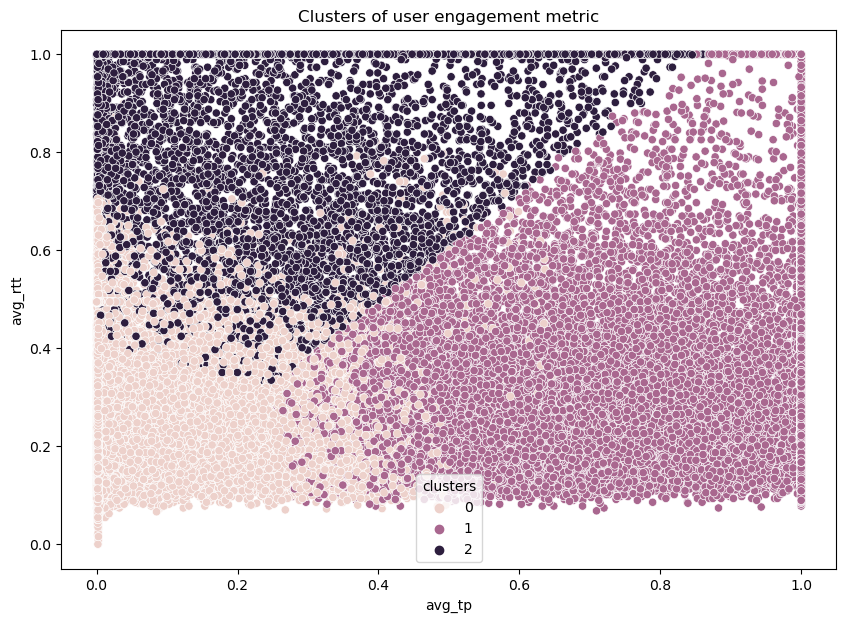

In [34]:
normalized_metrics['clusters'] = pred
plt.figure(figsize=(10,7))

sns.scatterplot(x = 'avg_tp', y='avg_rtt',
                hue='clusters', data=normalized_metrics).set_title('Clusters of user engagement metric')

plt.show()

## Task 4.1b

We need to save the engagement metrics for Task 4

In [46]:
experience_metrics_with_cluster

,msisdn,tcp_retrans,avg_rtt,handset_type,avg_tp,clusters
0,3.360100e+10,2.571697e+07,46.000000,Huawei P20 Lite Huawei Nova 3E,76.0,0
1,3.360100e+10,2.571697e+07,31.000000,Apple iPhone 7 (A1778),99.0,0
2,3.360100e+10,2.571697e+07,127.024885,undefined,97.0,0
3,3.360101e+10,2.571697e+07,84.000000,Apple iPhone 5S (A1457),248.0,0
4,3.360101e+10,1.754390e+07,59.500000,Apple iPhone Se (A1723),28422.0,1
...,...,...,...,...,...,...
106851,3.379000e+10,2.180450e+05,52.000000,Huawei Honor 9 Lite,10365.0,0
106852,3.379000e+10,2.571697e+07,40.000000,Apple iPhone 8 Plus (A1897),116.0,0
106853,3.197020e+12,2.571697e+07,127.024885,Quectel Wireless. Quectel Ec25-E,1.0,0
106854,3.370000e+14,2.571697e+07,127.024885,Huawei B525S-23A,33.0,0


In [47]:
exp_cluster_counts = experience_metrics_with_cluster['clusters'].value_counts()

experience_metrics_with_cluster.to_csv('experience_metrics_with_cluster.csv', index=False)

In [48]:
normal_metrics_with_cluster_2= normalized_metrics.copy()

In [49]:
kmeans

KMeans(n_clusters=3)

In [70]:
distance = kmeans.fit_transform(normal_metrics_with_cluster_2)

distance_from_less_experience = list(map(lambda x : x[0], distance))

experience_metrics_with_cluster_2 = experience_metrics_with_cluster.copy()
experience_metrics_with_cluster_2['score'] = distance_from_less_experience

In [71]:
# Group by customer (msisdn ) and calculate the average of each variable
# We save experience metrics df that has a score columns

experience_metrics_with_cluster_new = experience_metrics_with_cluster_2.groupby('msisdn').agg({
    'tcp_retrans': 'mean',
    'avg_rtt': 'mean',
    'handset_type': 'first',
    'avg_tp': 'mean',
    'clusters': 'first',
    'score': 'first'
}).reset_index()

experience_metrics_with_cluster_new

,msisdn,tcp_retrans,avg_rtt,handset_type,avg_tp,clusters,score
0,3.360100e+10,2.571697e+07,46.000000,Huawei P20 Lite Huawei Nova 3E,76.0,0,0.106571
1,3.360100e+10,2.571697e+07,31.000000,Apple iPhone 7 (A1778),99.0,0,0.161079
2,3.360100e+10,2.571697e+07,127.024885,undefined,97.0,0,0.224286
3,3.360101e+10,2.571697e+07,84.000000,Apple iPhone 5S (A1457),248.0,0,0.067828
4,3.360101e+10,1.754390e+07,59.500000,Apple iPhone Se (A1723),28422.0,1,1.159512
...,...,...,...,...,...,...,...
106851,3.379000e+10,2.180450e+05,52.000000,Huawei Honor 9 Lite,10365.0,0,0.573072
106852,3.379000e+10,2.571697e+07,40.000000,Apple iPhone 8 Plus (A1897),116.0,0,0.127781
106853,3.197020e+12,2.571697e+07,127.024885,Quectel Wireless. Quectel Ec25-E,1.0,0,0.224615
106854,3.370000e+14,2.571697e+07,127.024885,Huawei B525S-23A,33.0,0,0.224503


In [74]:
csv_file_path = 'experience_metrics.csv'

# Save the DataFrame to a CSV file
experience_metrics_with_cluster_new.to_csv(csv_file_path, index=False)